# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports

import panel as pn
pn.extension('plotly')
import hvplot
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units= sfo_data.groupby('year').mean()
housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

housing_units
year               
2010         372560
2011         374507
2012         376454
2013         378401
2014         380348
2015         382295
2016         384242

In [5]:
# Save the dataframe as a csv file
#housing_units.to_csv()

In [33]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
min = housing_units.min()['housing_units']
max = housing_units.max()['housing_units']
housing_units.hvplot.bar(ylim=(min-5000,max+5000),x='year',y="housing_units",ylabel='housing_units',rot=90,title='Housing units in San Fran from 2010 to 2016')

:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
avg_gross_avg_sale_sqft = sfo_data[['sale_price_sqr_foot','gross_rent']].groupby(by='year', level=None).mean()
avg_gross_avg_sale_sqft

sale_price_sqr_foot  gross_rent
year                                 
2010           369.344353        1239
2011           341.903429        1530
2012           399.389968        2324
2013           483.600304        2971
2014           556.277273        3528
2015           632.540352        3739
2016           697.643709        4390

In [32]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
# Line chart for average gross rent
avg_gross_rent_year = sfo_data['gross_rent'].groupby(by='year', level=None).mean()
avg_gross_rent_year.hvplot.line('year','gross_rent',ylabel="Gross Rent",title='Average Gross Rent by Year')

:Curve   [year]   (gross_rent)

In [31]:
# Line chart for average sale price per square foot
avg_sale_price_year = sfo_data['sale_price_sqr_foot'].groupby(by='year', level=None).mean()
avg_sale_price_year.hvplot.line('year',"sale_price_sqr_foot",ylabel='Avg Sale Price',title='Average Price per SqFT by Year')


:Curve   [year]   (sale_price_sqr_foot)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [10]:
# Group by year and neighborhood and then create a new dataframe of the mean values
average_prices_by_neighborhood = sfo_data.groupby(["year","neighborhood"]).mean()
average_prices_by_neighborhood.reset_index(inplace=True)
average_prices_by_neighborhood.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [28]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
average_prices_by_neighborhood.hvplot.line('year',"sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',groupby='neighborhood')


:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [12]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
average_prices_by_neighborhood.hvplot.line(x='year',y="gross_rent",ylabel='Avg. Monthly rent',groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [13]:
# Getting the data from the top 10 expensive neighborhoods to own
mean_neighborhood = sfo_data.groupby("neighborhood").mean()
mean_neighborhood = mean_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False)
mean_neighborhood_top_10 = mean_neighborhood.head(10)
mean_neighborhood_top_10.reset_index(inplace=True)
mean_neighborhood_top_10

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0  Union Square District           903.993258      377427.50  2555.166667
1         Merced Heights           788.844818      380348.00  3414.000000
2          Miraloma Park           779.810842      375967.25  2155.250000
3        Pacific Heights           689.555817      378401.00  2817.285714
4          Westwood Park           687.087575      382295.00  3959.000000
5         Telegraph Hill           676.506578      378401.00  2817.285714
6       Presidio Heights           675.350212      378401.00  2817.285714
7             Cow Hollow           665.964042      378401.00  2817.285714
8           Potrero Hill           662.013613      378401.00  2817.285714
9            South Beach           650.124479      375805.00  2099.000000

In [38]:
# Plotting the data from the top 10 expensive neighborhoods
mean_neighborhood_top_10.hvplot.bar(x='neighborhood',y="sale_price_sqr_foot",ylabel='Avg. Sale Price per Square Foot',rot=90,title='Top 10 most ecpensive neighboorhods in SFO')

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [15]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
average_prices_by_neighborhood.reset_index(inplace=True)
average_prices_by_neighborhood

index  year            neighborhood  sale_price_sqr_foot  housing_units  \
0        0  2010            Alamo Square           291.182945         372560   
1        1  2010              Anza Vista           267.932583         372560   
2        2  2010                 Bayview           170.098665         372560   
3        3  2010        Buena Vista Park           347.394919         372560   
4        4  2010        Central Richmond           319.027623         372560   
..     ...   ...                     ...                  ...            ...   
392    392  2016          Telegraph Hill           903.049771         384242   
393    393  2016              Twin Peaks           970.085470         384242   
394    394  2016  Van Ness/ Civic Center           552.602567         384242   
395    395  2016       Visitacion Valley           328.319007         384242   
396    396  2016           Westwood Park           631.195426         384242   

     gross_rent  
0          1239  
1          1239  
2          1239  
3          1239  
4          1239  
..          ...  
392        4390  
393        4390  
394        4390  
395        4390  
396        4390  

[397 rows x 6 columns]

In [35]:
# Plotting the data from the top 10 expensive neighborhoods
average_prices_by_neighborhood.hvplot.bar(x='year',y=["sale_price_sqr_foot","gross_rent"],stacked=False,ylabel='Num Housing Units',groupby='neighborhood',rot=90,width=900,title='Top 10 most ecpensive neighboorhods in SFO')


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [17]:
# Load neighborhoods coordinates data
coor_data = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(coor_data)
df_neighborhood_locations.rename(columns={"Neighborhood": "neighborhood"}, inplace=True)
df_neighborhood_locations.head()

neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [18]:
# Calculate the mean values for each neighborhood
neighborhood_mean = sfo_data.groupby("neighborhood").mean()
neighborhood_mean.reset_index(inplace=True)
neighborhood_mean.head()

neighborhood  sale_price_sqr_foot  housing_units   gross_rent
0     Alamo Square           366.020712       378401.0  2817.285714
1       Anza Vista           373.382198       379050.0  3031.833333
2          Bayview           204.588623       376454.0  2318.400000
3  Bayview Heights           590.792839       382295.0  3739.000000
4  Bernal Heights            576.746488       379374.5  3080.333333

In [19]:
# Join the average values with the neighborhood locations
mean_neighborhood_location = pd.merge(df_neighborhood_locations, neighborhood_mean, on="neighborhood")
mean_neighborhood_location.head()

neighborhood        Lat         Lon  sale_price_sqr_foot  \
0      Alamo Square  37.791012 -122.402100           366.020712   
1        Anza Vista  37.779598 -122.443451           373.382198   
2           Bayview  37.734670 -122.401060           204.588623   
3   Bayview Heights  37.728740 -122.410980           590.792839   
4  Buena Vista Park  37.768160 -122.439330           452.680591   

   housing_units   gross_rent  
0       378401.0  2817.285714  
1       379050.0  3031.833333  
2       376454.0  2318.400000  
3       382295.0  3739.000000  
4       378076.5  2698.833333

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

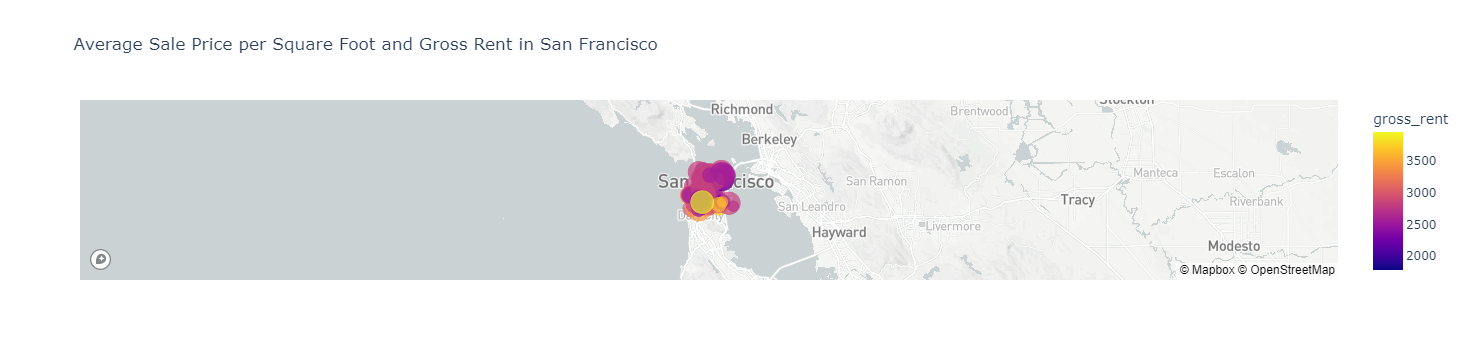

In [39]:
# Set the mapbox access token
px.set_mapbox_access_token(map_box_api)


# Create a scatter mapbox to analyze neighborhood info
map=px.scatter_mapbox(
    mean_neighborhood_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco",
)
map.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [21]:
# Fetch the data from all expensive neighborhoods per year.
mean_neighborhood = sfo_data.groupby("neighborhood").mean()
mean_neighborhood = mean_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False)
mean_neighborhood_top_10 = mean_neighborhood.head(10)
mean_neighborhood_top_10.reset_index(inplace=True)

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


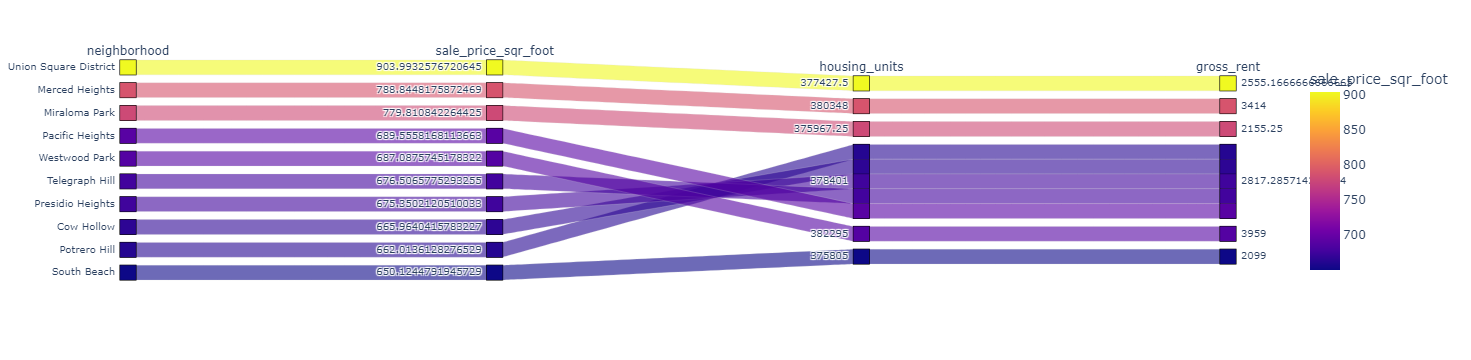

In [22]:
# Parallel Categories Plot
catagories_plot=px.parallel_categories(mean_neighborhood_top_10, color='sale_price_sqr_foot',)
catagories_plot.show()

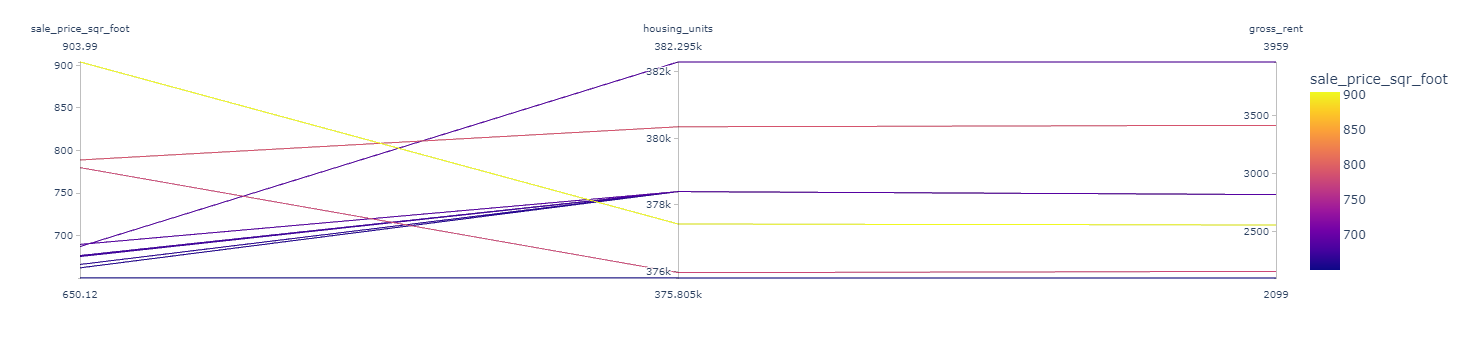

In [23]:
# Parallel Coordinates Plot
coor_plot=px.parallel_coordinates(mean_neighborhood_top_10, color='sale_price_sqr_foot')
coor_plot.show()